# **Introduction**


**Salman Rahwidean Janotama** || **18/428633/TK/47135**

---

**Artificial Intelligence - Airline Passenger Satisfaction**

Pada notebook ini akan diselesaikan masalah dari sebuah maskapai penerbangan. Masalah tersebut adalah **diperlukan sebuah analisis hasil survey penumpang yang berisi rating dari setiap layanan yang disediakan oleh maskapai serta tingkat kepuasannya**. Hasil dari analisis ini diharapkan Maskapai dapat **mengetahui faktor/layanan apa yang paling berpengaruh dengan tingkat kepuasan penumpang**.

Proses analisis akan dilakukan dengan menggunakan **Algoritma K-Nearest Neighbors**.

# **Dataset**

Dataset yang digunakan adalah data set **Airline Passenger Satisfaction** yang didapat dari Kaggle. Dataset berisikan 23 instances yang terbagi menjadi dua kategori besar, yaitu informasi pribadi dan rating layanan maskapai.

*link dataset:* https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

##**Preprocessing Dataset**

**Cloning Repository untuk mendapatkan dataset**

In [86]:
!git clone https://github.com/salmanrj/Airline-Passenger-Satisfaction.git

fatal: destination path 'Airline-Passenger-Satisfaction' already exists and is not an empty directory.


**List library yang digunakan**

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rnd
import seaborn as sns

**Path untuk dataset yang dimiliki**

In [88]:
PATH_DATASET = "/content/Airline-Passenger-Satisfaction/dataset/dataset.csv"

**Plot dataset Train yang dimiliki**

In [89]:
data = pd.read_csv(PATH_DATASET, index_col='id')
data = data.sort_values('id', ascending=True)
data.head()

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,,
1,90131,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,3,5,3,5,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
2,47865,Female,Loyal Customer,35,Business travel,Business,821,2,2,2,2,3,5,4,5,5,5,5,3,5,5,26,39.0,satisfied
3,44425,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,4,5,5,5,3,3,3,3,4,3,5,0,0.0,satisfied
4,96450,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,2,4,4,5,5,5,5,5,3,5,4,0,0.0,satisfied
5,72524,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,3,4,5,4,3,3,4,3,3,3,5,0,1.0,satisfied


Karena terdapat data yang tidak diperlukan maka kolom "Unnamed: 0" akan dibuang

In [90]:
data = data.drop('Unnamed: 0', axis=1)
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,3,5,3,5,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
2,Female,Loyal Customer,35,Business travel,Business,821,2,2,2,2,3,5,4,5,5,5,5,3,5,5,26,39.0,satisfied
3,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,4,5,5,5,3,3,3,3,4,3,5,0,0.0,satisfied
4,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,2,4,4,5,5,5,5,5,3,5,4,0,0.0,satisfied
5,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,3,4,5,4,3,3,4,3,3,3,5,0,1.0,satisfied


**Dimensi matriks untuk data train dan informasi tentang data**

In [91]:
data.shape

(103904, 23)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 1 to 129880
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [93]:
data.nunique().sort_values(ascending=False)

Flight Distance                      3802
Arrival Delay in Minutes              455
Departure Delay in Minutes            446
Age                                    75
Online boarding                         6
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           6
Food and drink                          6
Seat comfort                            6
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Checkin service                         6
Inflight service                        6
Cleanliness                             6
Baggage handling                        5
Class                                   3
Customer Type                           2
satisfaction                            2
Type of Travel                          2
Gender                                  2
dtype: int64

Terdapat 23 Features dari data dan jumlah nilai unik dari setiap features

**Cek jumlah data yang hilang**

In [94]:
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

Terdapat 310 data yang hilang pada baris "Arrival Delay in Minutes" karena data yang dimiliki lebih dari 100.000 maka baris data yang hilang akan di hapus/drop (tidak akan berdampak banyak).

**Ukuran dari data yang akan digunakan**

In [95]:
data = data.dropna().copy()
data.shape

(103594, 23)

**Cek jumlah data yang duplicate**

In [96]:
data.duplicated().any()

False

Tidak ada data yang terduplikat.

**Cek jumlah outliers**

In [97]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Dari deskripsi tabel diatas terlihat pada **Departure Delay in Minutes** dan **Arrival Delay in Minutes** memiliki nilai max yang terpaut sangat jauh. Sehigga dicurigai adanya outliers pada data tersebut

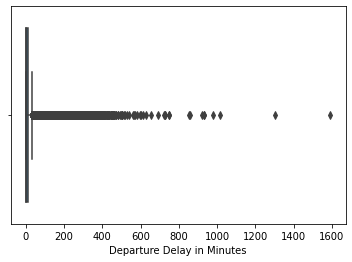

In [98]:
sns.boxplot(x=data['Departure Delay in Minutes'])

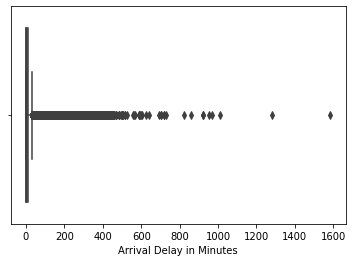

In [99]:
sns.boxplot(x=data['Arrival Delay in Minutes'])

Dari visualisasi boxplot juga terlihat bahwa ada outliers pada kedua data tersebut.

In [100]:
data.loc[data['Departure Delay in Minutes'] > 1200]
data.loc[data['Arrival Delay in Minutes'] > 1200]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
69661,Male,Loyal Customer,32,Business travel,Business,2916,2,2,2,2,5,5,5,3,4,5,4,5,3,5,1305,1280.0,satisfied
73471,Female,Loyal Customer,47,Personal Travel,Eco,1120,2,2,2,3,2,4,2,2,4,4,4,2,3,2,1592,1584.0,neutral or dissatisfied


Ada 2 outliers dari data tersebut, agar pada proses selanjutnya data ini tidak mengganggu proses Machine Learning, maka data ini akan dihapus.

In [101]:
outliers = data[data['Arrival Delay in Minutes'] > 1200].index
data.drop(outliers, inplace=True)
data.shape

(103592, 23)

**Cek tipe data**

In [102]:
data['satisfaction'].value_counts()
data['satisfaction'] = pd.get_dummies(data['satisfaction'])
data['satisfaction']

id
1         1
2         0
3         0
4         0
5         0
         ..
129874    1
129875    1
129878    1
129879    0
129880    1
Name: satisfaction, Length: 103592, dtype: uint8

Pada data **Satisfaction** berbentuk categorical, sehingga perlu dirubah menjadi index 0 dan 1 agar memudahkan proses Machine Learning

data 0 = neutral or dissatisfied

data 1 = satisfied

In [103]:
data.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

Pada data **Gender**, **Customer Type**, **Type of Travel**, dan **Class** juga merupakan data categorical (*dtype = object*). Maka data tersebut juga akan dirubah menjadi index menggunakan fungsi *get_dummies* dari **pandas**.

In [104]:
categorical = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
for i in categorical:
  data[i] = pd.get_dummies(data[i])

data.dtypes

Gender                                 uint8
Customer Type                          uint8
Age                                    int64
Type of Travel                         uint8
Class                                  uint8
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

# **Data Visualization**

Dataset yang sudah dibersihkan akan divisualisasikan untuk melihat insight yang bisa didapatkan.

**Melihat korelasi antar instances**

In [105]:
correlation = data.corr()
np.fill_diagonal(correlation.values, 0)
correlation.replace(0, np.nan, inplace=True)
correlation

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Gender,NaN,-0.031558,-0.008930,0.006829,-0.010455,-0.006062,-0.008964,-0.008847,-0.007166,-0.000221,-0.005686,0.042159,0.026666,-0.006064,-0.008019,-0.031835,-0.037333,-0.010415,-0.038937,-0.006417,-0.002632,-0.000467,0.012337
Customer Type,-0.031558,NaN,0.281822,-0.308269,0.085520,0.225359,0.007711,0.207015,0.019632,-0.006290,0.059553,0.189471,0.159723,0.110112,0.056369,0.047801,-0.024893,0.032064,-0.023051,0.083757,-0.004738,-0.005150,-0.187559
Age,-0.008930,0.281822,NaN,0.048604,0.139029,0.099848,0.017470,0.038038,0.024462,-0.001562,0.022931,0.208687,0.160315,0.076384,0.057123,0.040502,-0.047619,0.035015,-0.049900,0.053505,-0.010336,-0.012353,-0.137051
Type of Travel,0.006829,-0.308269,0.048604,NaN,0.552022,0.267638,0.104876,-0.259839,0.133396,0.030808,0.063104,0.224625,0.123974,0.147968,0.056473,0.138682,0.031358,-0.017067,0.022488,0.078747,0.006514,0.006136,-0.448985
Class,-0.010455,0.085520,0.139029,0.552022,NaN,0.467181,0.032777,-0.096812,0.107492,0.004515,0.086895,0.330491,0.232969,0.198940,0.220676,0.213399,0.171112,0.162364,0.165850,0.139341,-0.010460,-0.015029,-0.503934
Flight Distance,-0.006062,0.225359,0.099848,0.267638,0.467181,NaN,0.007059,-0.019898,0.065707,0.004745,0.056935,0.215174,0.157501,0.128651,0.109534,0.133822,0.063218,0.073203,0.057440,0.093101,0.001387,-0.002984,-0.298903
Inflight wifi service,-0.008964,0.007711,0.017470,0.104876,0.032777,0.007059,NaN,0.343753,0.715846,0.336125,0.134607,0.457018,0.122619,0.209508,0.121489,0.160496,0.121064,0.043181,0.110621,0.132656,-0.017292,-0.018956,-0.284168
Departure/Arrival time convenient,-0.008847,0.207015,0.038038,-0.259839,-0.096812,-0.019898,0.343753,NaN,0.437017,0.444599,0.005192,0.070003,0.011416,-0.004692,0.068611,0.012473,0.071905,0.093333,0.073220,0.014339,0.001314,-0.000378,0.051717
Ease of Online booking,-0.007166,0.019632,0.024462,0.133396,0.107492,0.065707,0.715846,0.437017,NaN,0.458744,0.031943,0.404108,0.030022,0.047178,0.038764,0.107442,0.038855,0.010959,0.035325,0.016194,-0.005982,-0.007703,-0.171511
Gate location,-0.000221,-0.006290,-0.001562,0.030808,0.004515,0.004745,0.336125,0.444599,0.458744,NaN,-0.001160,0.001461,0.003392,0.003562,-0.028529,-0.005859,0.002423,-0.035441,0.001738,-0.004005,0.005857,0.005449,-0.000458


**Plotting dengan Heat Map**

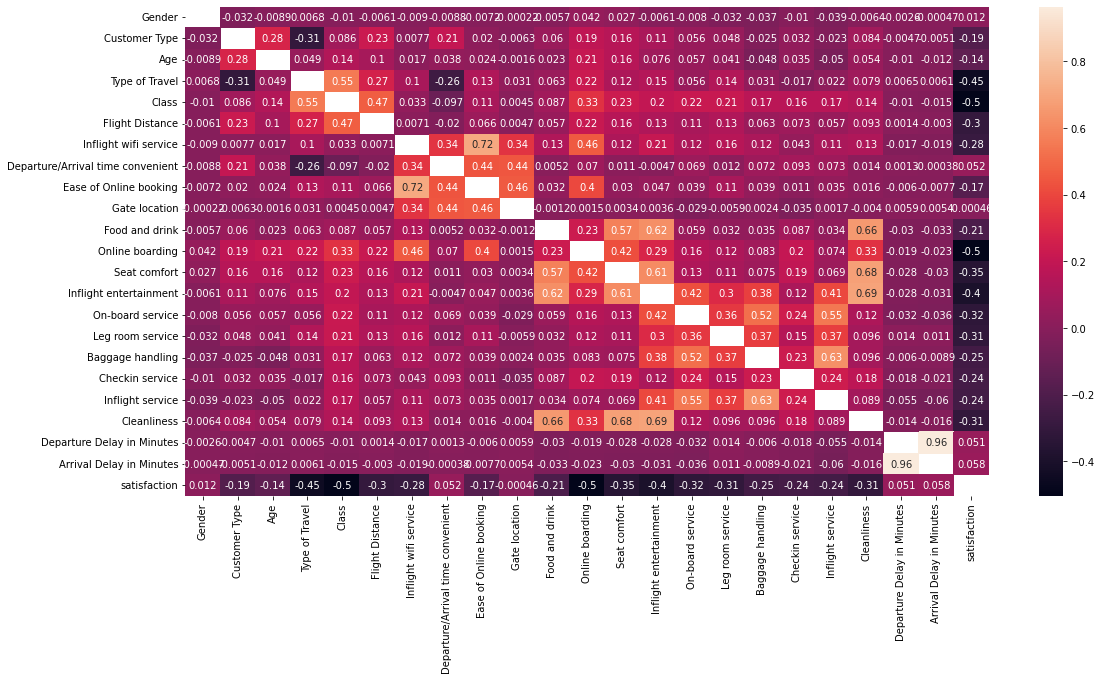

In [106]:
plt.figure(figsize = (18,9))
sns.heatmap(correlation, annot = True)

In [107]:
correlation.unstack().sort_values(kind = 'quicksort', na_position = 'first').drop_duplicates(keep = 'first')

Gender                    Gender                             NaN
satisfaction              Class                        -0.503934
Online boarding           satisfaction                 -0.503447
satisfaction              Type of Travel               -0.448985
Inflight entertainment    satisfaction                 -0.398204
                                                          ...   
Food and drink            Cleanliness                   0.657639
Seat comfort              Cleanliness                   0.678470
Inflight entertainment    Cleanliness                   0.691742
Ease of Online booking    Inflight wifi service         0.715846
Arrival Delay in Minutes  Departure Delay in Minutes    0.964538
Length: 254, dtype: float64

In [108]:
data.corr().abs()['satisfaction'].sort_values(ascending = False)

satisfaction                         1.000000
Class                                0.503934
Online boarding                      0.503447
Type of Travel                       0.448985
Inflight entertainment               0.398204
Seat comfort                         0.349098
On-board service                     0.322453
Leg room service                     0.313179
Cleanliness                          0.305034
Flight Distance                      0.298903
Inflight wifi service                0.284168
Baggage handling                     0.247821
Inflight service                     0.244857
Checkin service                      0.235897
Food and drink                       0.209641
Customer Type                        0.187559
Ease of Online booking               0.171511
Age                                  0.137051
Arrival Delay in Minutes             0.058370
Departure/Arrival time convenient    0.051717
Departure Delay in Minutes           0.051252
Gender                            

Berdasarkan hasil visualisasi, maka didapatkan beberapa instances yang korelasinya sangat kuat dengan **Satisfaction**. Adapun 5 layanan yang paling memberikan **Satisfaction** bagi penumpang adalah **Class**, **Online Boarding**, **Type of Travel**, **Inflight Entertainment**, dan **Seat Comfort**

Sedangkan 5 layanan yang mungkin bisa di improve pihak maskapai dari segi layanan on-board adalah **Inflight Entertainment**, **Seat Comfort**, **On-Board Service**, **Leg Room Service**, dan **Cleanliness**.

# **K-Nearest Neighbors**

Selanjutnya akan dilakukan prediksi dengan Machine Learning menggunakan Algoritma K-Nearest Neightbors

**Dataset Training dan Testing**

In [109]:
X = data.drop('satisfaction', axis=1).iloc[:5000].values
y = data['satisfaction'].iloc[:5000].values

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Untuk kemudahan, karena jumlah dataset yang sangat besar akan memakan waktu lama dalam proses training, maka untuk prediksi ini akan digunakan 5000 data saja dengan perbandingan train:test adalah 80:20.

**Main Function untuk Algoritma KNN**

In [111]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn.metrics import accuracy_score

class MyKNeighborsClassifier():
 
    def __init__(self, n_neighbors=5):
        self.n_neighbors=n_neighbors

    # X digunakan untuk array features, sedangkan y sebagai array labels    
    def fit(self, X, y):
        
        n_samples = X.shape[0]
        # Cek jumlah neighbor tidak boleh lebih dari jumlah sample
        if self.n_neighbors > n_samples:
            raise ValueError("Number of neighbors can't be larger then number of samples in training set.")
        
        # Cek jumlah data dan label harus sama
        if X.shape[0] != y.shape[0]:
            raise ValueError("Number of samples in X and y need to be equal.")
        
        # finding and saving all possible class labels
        self.classes_ = np.unique(y)
        
        self.X = X
        self.y = y
        
    def predict(self, X_test):
        
        # number of predictions to make and number of features inside single sample
        n_predictions, n_features = X_test.shape
        
        # allocationg space for array of predictions
        predictions = np.empty(n_predictions, dtype=int)
        
        # loop over all observations
        for i in range(n_predictions):
            # calculation of single prediction
            predictions[i] = single_prediction(self.X, self.y, X_test[i, :], self.n_neighbors)

        return (predictions)

In [112]:
def single_prediction(X, y, x_train, k):
    
    # number of samples inside training set
    n_samples = X.shape[0]
    
    # create array for distances and targets
    distances = np.empty(n_samples, dtype=np.float64)

    # distance calculation
    for i in range(n_samples):
        distances[i] = (x_train - X[i]).dot(x_train - X[i])
    
    # combining arrays as columns
    distances = sp.c_[distances, y]
    # sorting array by value of first column
    sorted_distances = distances[distances[:,0].argsort()]
    # celecting labels associeted with k smallest distances
    targets = sorted_distances[0:k,1]

    unique, counts = np.unique(targets, return_counts=True)
    return(unique[np.argmax(counts)])

In [113]:
# Instantiate learning model (k = 7)
my_classifier = MyKNeighborsClassifier(n_neighbors=7)

# Fitting the model
my_classifier.fit(X_train, y_train)

# Predicting the Test set results
my_y_pred = my_classifier.predict(X_test)

In [114]:
accuracy = accuracy_score(y_test, my_y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 73.6 %.


Hasil akhir dari model prediksi didapatkan nilai akurasi sebesar **73.6%**

# **Conclusion**

Secara umum, tujuan dari analysis ini sudah didapatkan. Berdasarkan hasil analisis survey, layanan dari maskapai penerbangan yang sangat mempengaruhi tingkat kepuasan penumpang adalah **Class**, **Online Boarding**, **Type of Travel**, **Inflight Entertainment**, dan **Seat Comfort**.

Sedangkan untuk on-board service yang bisa ditingkatkan oleh pihak maskapai antara lain adalah **Inflight Entertainment**, **Seat Comfort**, **On-Board Service**, **Leg Room Service**, dan **Cleanliness**.

Berdasarkan prediksi juga, apabila pihak maskapai **memfokuskan improvement pada layanan-layanan diatas**, maka kami bisa memprediksi dengan **tingkat kepercayaan** sebesar **73.6%** bahwa penumpang akan merasa puas dengan penerbangan mereka.

**Referensi**

https://www.kaggle.com/nicolasgertler/airline-passenger-satisfaction-prediction-9-6

https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification